In [19]:
# import the necessary libraries
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and cleaning the dataset

In [2]:
df = pd.read_csv('Fraud.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Checking the types of transactions**

In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

**Changing the nominal values in the feature 'type' into numeric values**

In [7]:
mapping = {label:idx for idx,label in enumerate(np.unique(df['type']))}
df['type'] = df['type'].map(mapping)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Checking for missing values in data**

In [8]:
df.columns[df.isnull().any()].tolist()

[]

There are no missing values in our data

# Adressing Class imbalance

In [9]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

**Checking the lengths of both classes 0 and 1**

In [10]:
print('No.of fraudulent transactions: ',df[df['isFraud']==1].shape[0])
print('No.of non-fraudulent transactions: ',df[df['isFraud']==0].shape[0])    

No.of fraudulent transactions:  8213
No.of non-fraudulent transactions:  6354407


Since the no. of non fraudulent transactions are way greater than the fraudulent transactions, we have to let go of some of the class 0 rows so that both of the classes are approximately equalised. Else this can lead to bias in model results.

**Downsampling non-fraud transactions**

In [11]:
df_fraud = df[df['isFraud']==1]
df_non_fraud = df[df['isFraud']==0]

df_non_fraud_downsample = resample(df_non_fraud,
               replace=False,  # Down sample without replacement
               n_samples=8213,   # Number to match minority class 1
               random_state=42)
df_sample = pd.concat([df_fraud, df_non_fraud_downsample])

# Display shape of the new down-sampled dataset
print(df_sample.shape)   
# Display count of data points in both class
print(df_sample['isFraud'].value_counts())

(16426, 11)
1    8213
0    8213
Name: isFraud, dtype: int64


# Adressing Multicollinearity

**Calculating Variance Inflation Factors**

In [12]:
df1 = df_sample.drop(['nameOrig','nameDest'], axis=1)
#create a dataframe to display the VIF of all the features
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]
  
vif_data

,feature,VIF
0,step,2.815029
1,type,2.696727
2,amount,28.243142
3,oldbalanceOrg,74.198017
4,newbalanceOrig,39.647260
5,oldbalanceDest,15.471014
6,newbalanceDest,17.957878
7,isFraud,2.866483
8,isFlaggedFraud,1.147789


We find the features 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest' and 'newbalanceDest' haaving high VIF values, implying strngly correlated

**Plot heatmap**

<AxesSubplot:>

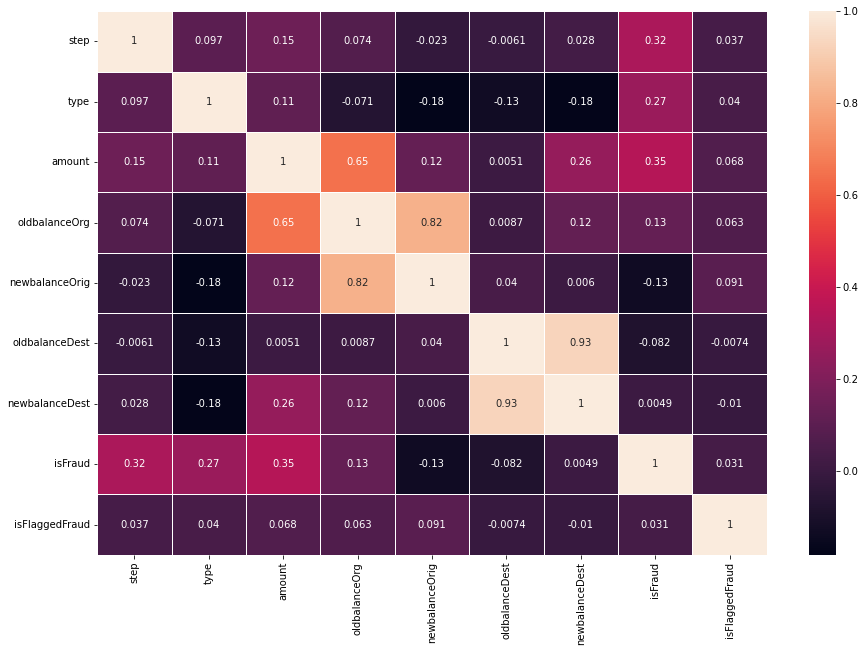

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True, linewidths=.5, ax=ax)

**Pairplot**

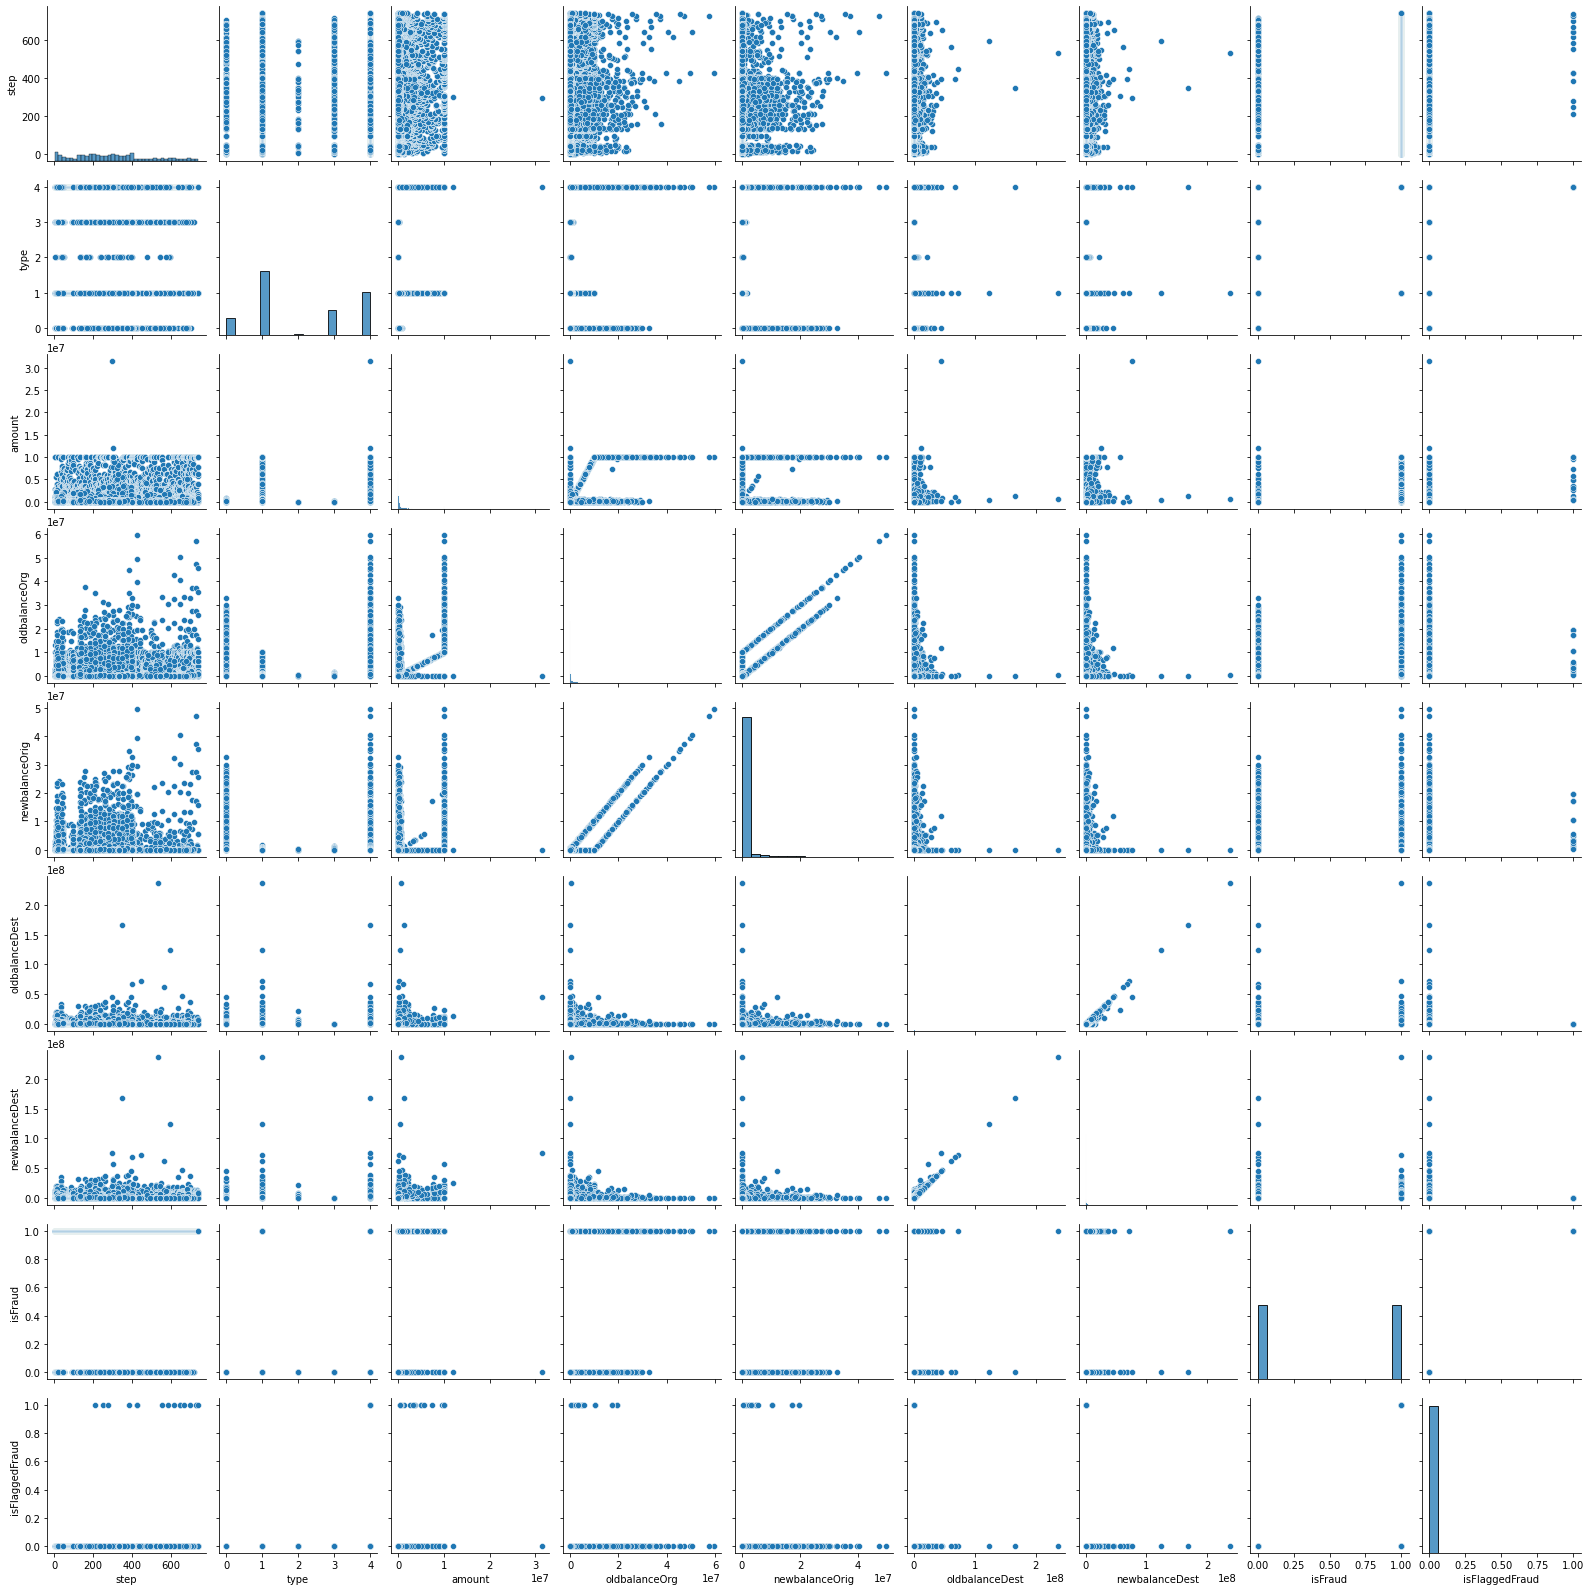

In [14]:
sns.pairplot(df1)

By analysing the VIF values and the pairwise correlation values from heatmaps we drop the features 'newbalanceOrig' and 'newbalanceDest'.

All the other features, apart from the above analysis intuitively seems to be contributing to the decision making for unusual transactions.

In [15]:
df2 = df1.drop(['newbalanceOrig','newbalanceDest'], axis=1)

# Training and Testing models 

**Splitting the data into train/test sets**

In [16]:
y = df2['isFraud']
X = df2.drop(['isFraud'], axis=1)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
print("Length of train data", X_train.shape[0])
print("Length of test data", X_test.shape[0])

Length of train data 13140
Length of test data 3286


**Fraud Prediction with different classification models and comparision of performances**

In [17]:
logr =  LogisticRegression(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(max_depth=5, random_state=0)
svc = SVC(random_state=0)
xgb = GradientBoostingClassifier(n_estimators=200, max_depth=5)
logr.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
print('Logistic Regression:')
print('Accuracy: ', accuracy_score(y_test, logr.predict(X_test)))
print(classification_report(y_test, logr.predict(X_test)))
print('*********************************************************************************')
print('Decision Tree:')
print('Accuracy: ', accuracy_score(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))
print('*********************************************************************************')
print('Support Vector Classifier:')
print('Accuracy: ', accuracy_score(y_test, svc.predict(X_test)))
print(classification_report(y_test, svc.predict(X_test)))
print('*********************************************************************************')
print('Random Forests:')
print('Accuracy: ', accuracy_score(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))
print('*********************************************************************************')
print('XGBoost:')
print('Accuracy: ', accuracy_score(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))
print('*********************************************************************************')

Logistic Regression:
Accuracy:  0.6591600730371272
              precision    recall  f1-score   support

           0       0.81      0.41      0.55      1637
           1       0.61      0.91      0.73      1649

    accuracy                           0.66      3286
   macro avg       0.71      0.66      0.64      3286
weighted avg       0.71      0.66      0.64      3286

*********************************************************************************
Decision Tree:
Accuracy:  0.9768715763846622
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1637
           1       0.97      0.98      0.98      1649

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

*********************************************************************************
Support Vector Classifier:
Accuracy:  0.7790626902008521
              precision    re

Accuracy is not a good metric to test the performance of fraud detection models when there is class imbalance. For example, consider a dataset with one fraudulent transaction and 99 non-fraudulent transactions (in the real world, the ratio is even smaller). If a machine learning model were to classify every single transaction as non-fraudulent, it would be 99% accurate! Unfortunately, we’re not worried about non-fraudulent transactions and this accuracy-based model fails to tackle the problem at hand. **But since we have dealt with the class imbalance issue, we can focus on the accuracy metric as well.**

One should use precision when the cost of classifying a non-fraudulent transaction as fraudulent is too high and okay with only catching a portion of fraudulent transactions. **So precision is not a good metric either.**

It’s absolutely critical we identify every single fraudulent transaction and feel okay with incorrectly classifying some non-fraudulent transactions as fraudulent. **So we focus more on recall here.**

Considering the above factors, the best performing model among the ones we have tested turns out to be **XGBoost**

# A note on XGBoost:

XGBoost stands for Extreme Gradient Boosting. It is an implementation of Gradient Boosted decision trees. 

Boosting is an ensemble modelling, technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Gradient Boosting is a popular boosting algorithm. In gradient boosting, each predictor corrects its predecessor’s error (each predictor is trained using the residual errors of predecessor as labels).

In XGBoost algorithm, decision trees are created in sequential form. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model.

# Outlier Detection using Isolation Forest

In [21]:
model = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.2), random_state=42)
model.fit(X)
predictions = model.predict(X)
for i in range(len(predictions)):
    if predictions[i]==1:
        predictions[i]=0
    else:
        predictions[i]=1
print('Accuracy:',accuracy_score(y, predictions))
print("Recall:", recall_score(y, predictions))

C:\Users\SutirthaBiswas\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.540606355777426
Recall: 0.24059417995860222


# Does our model really work in realtime?

The only way to truly test if our model works or not is to implement it in real-time, wait for some unusual activities and match the results with the customer's feedback. We cannot afford to be wrong when really a fraud occurs. So we can send alert messages every time a fraud is detected and ask our cutomer if it was really one. In this way we can continue to test and improve our models's recall everytime on millions of transactions. An alternative approach could be, to simulate previous fraudulent transactions manually by domain experts, and train on those artificially synthesized data. 